##### Info:
This tutorials aims to provide a short overview of an analysis of variance between land cover classes and their digital number values. The values were randomly created, as well as the labels per land cover class. 
This short tutorial is based on a blog post found here:

http://hamalg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html?m=1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

##### Generating random labels

In [13]:
np.random.seed(123)
classes = ["forest", "urban", "grassland", "water", "cropland"]
labels = np.random.choice(a = classes, p = [0.05, 0.15, 0.25, 0.05, 0.5], size = 10000)
labels

array(['cropland', 'grassland', 'grassland', ..., 'cropland', 'grassland',
       'cropland'], dtype='<U9')

##### Generating random digital numbers

In [12]:
dn_values = np.random.choice(500, size = 10000)
dn_values

array([140, 224,  11, ..., 152, 254, 475])

##### Creating dataframe

In [14]:
df = pd.DataFrame({'label': labels, 'dn': dn_values})
df.head(10)

,label,dn
0,cropland,140
1,grassland,224
2,grassland,11
3,cropland,407
4,cropland,323
5,grassland,308
6,cropland,409
7,cropland,492
8,water,457
9,grassland,223


##### Grouping data by label

In [17]:
groups = df.groupby('label').groups
groups

{'cropland': Int64Index([   0,    3,    4,    6,    7,   11,   15,   18,   19,   20,
             ...
             9982, 9983, 9986, 9987, 9988, 9989, 9994, 9996, 9997, 9999],
            dtype='int64', length=5035),
 'forest': Int64Index([  74,   87,  118,  147,  186,  194,  196,  209,  229,  235,
             ...
             9714, 9730, 9760, 9784, 9810, 9848, 9862, 9918, 9930, 9985],
            dtype='int64', length=504),
 'grassland': Int64Index([   1,    2,    5,    9,   10,   12,   14,   25,   26,   27,
             ...
             9968, 9969, 9974, 9975, 9978, 9980, 9990, 9992, 9995, 9998],
            dtype='int64', length=2422),
 'urban': Int64Index([  13,   16,   17,   30,   41,   50,   65,   68,   70,   77,
             ...
             9951, 9960, 9961, 9967, 9973, 9979, 9981, 9984, 9991, 9993],
            dtype='int64', length=1560),
 'water': Int64Index([   8,   33,   46,  138,  144,  184,  198,  215,  226,  241,
             ...
             9740, 9746, 9770, 9797, 9

##### Extracting the individual groups in an array

In [19]:
forest = dn_values[groups['forest']]
cropland = dn_values[groups['cropland']]
grassland = dn_values[groups['grassland']]
urban = dn_values[groups['urban']]
water = dn_values[groups['water']]

##### Performing the anova

In [20]:
stats.f_oneway(forest, cropland, grassland, urban, water)

F_onewayResult(statistic=1.647964039875993, pvalue=0.15918633054959683)

##### Performing the post - hoc test

In [22]:
cid_pairs = []
for cid1 in range(4):
    for cid2 in range(cid1+1,5):
        cid_pairs.append((classes[cid1], classes[cid2]))

cid_pairs 

[('forest', 'urban'),
 ('forest', 'grassland'),
 ('forest', 'water'),
 ('forest', 'cropland'),
 ('urban', 'grassland'),
 ('urban', 'water'),
 ('urban', 'cropland'),
 ('grassland', 'water'),
 ('grassland', 'cropland'),
 ('water', 'cropland')]

In [24]:
for cid1, cid2 in cid_pairs:
    print(cid1, cid2)
    print(stats.ttest_ind(dn_values[groups[cid1]],
                         dn_values[groups[cid2]]))

forest urban
Ttest_indResult(statistic=-0.20675046056039545, pvalue=0.8362251598797402)
forest grassland
Ttest_indResult(statistic=0.8951437358471568, pvalue=0.3707839364352341)
forest water
Ttest_indResult(statistic=-0.9938465069785642, pvalue=0.32054267302486844)
forest cropland
Ttest_indResult(statistic=0.5688319571053333, pvalue=0.5694932559039361)
urban grassland
Ttest_indResult(statistic=1.677531839210868, pvalue=0.09351704832379107)
urban water
Ttest_indResult(statistic=-1.0148084555543668, pvalue=0.31031766097049607)
urban cropland
Ttest_indResult(statistic=1.282719641901738, pvalue=0.19963540901243756)
grassland water
Ttest_indResult(statistic=-2.1432914945972614, pvalue=0.032172690895783916)
grassland cropland
Ttest_indResult(statistic=-0.6994352164213744, pvalue=0.48430190792859973)
water cropland
Ttest_indResult(statistic=1.8831120210239238, pvalue=0.05973779951141668)


In uneven datasets there is the need to adjust for the number of comparisons made by dividing the statistical significance level by the number of comparisons made. In our case we have a total number of 10 comparisons, and we are looking at a 5% level of significance, therefore we check p-values of the order 0.05/10 = 0.005 or less. This case of adjustment is called Bonferronni correction

##### Using Tukey post hoc

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

##### Calculating the Tukey post hoc

In [29]:
tukey = pairwise_tukeyhsd(endog = dn_values,
                         groups = labels,
                         alpha = 0.05) # Significant level


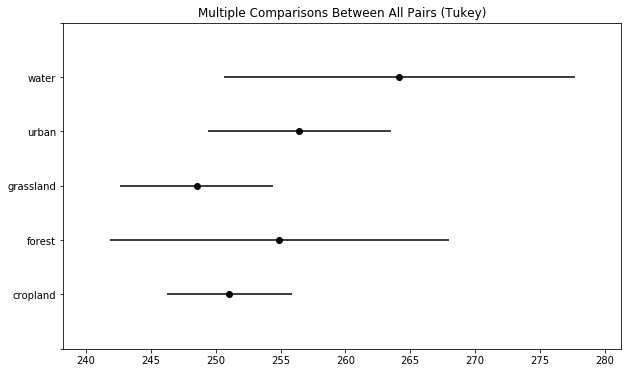

In [34]:
tukey.plot_simultaneous()
plt.vlines(x = 0, ymin = 0, ymax = 5, color = 'green')

In [35]:
tukey.summary()

group1,group2,meandiff,lower,upper,reject
cropland,forest,3.8692,-14.6896,22.428,False
cropland,grassland,-2.5195,-12.3425,7.3034,False
cropland,urban,5.4078,-6.1027,16.9183,False
cropland,water,13.1131,-5.8808,32.107,False
forest,grassland,-6.3888,-25.8371,13.0596,False
forest,urban,1.5386,-18.8143,21.8914,False
forest,water,9.2439,-16.104,34.5918,False
grassland,urban,7.9273,-4.9685,20.8232,False
grassland,water,15.6326,-4.2314,35.4967,False
urban,water,7.7053,-13.0451,28.4557,False


##### Summary:
The output of a Tukey test, shows us the suggestion based on the data, if we should or not reject a null hypothesis (there are no differences between the mean values of the groups). This test above suggest that we cannot reject the null hypothesis in any of the comparisons.